# 투빅스 13기 김현선
## 3주차 과제

# 1) 6개의 Toy Data에 대해 다양한 Clustering 적용해보기
### 아래 예시와 같이 다양하게 자신의 생각 도출하기
 - 지역적 패턴이 존재하는 DataSet에는 XX Clustering 방법을 쓰면 좋을 것 같다
 - XX Clustering은 길게 늘어진 데이터에 대해 잘 분류하는 것 같다
 - XX Clustering은 군집의 개수를 미리 정해야 해서 ~~ 경향이 있는 것 같다
 
### 조건
 - (기본)우리가 배운 3가지 Clustering
 - 데이터 간/클러스터 간 거리 측정 방식 다양하게 사용해서 비교
 - 새로운 Clustering 방법 사용하기(최소 2개 이상)

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [17]:
# 그래프 한글 깨짐 방지 폰트 설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

### ToyData 만들기

In [2]:
# 다른 모양 Toy Data 6개 만들기
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

### 만든 모든 모형 한번에 보기

In [3]:
#데이터 지정(분류)

X1,y1 = noisy_circles;  X2,y2 = noisy_moons;  X3,y3 = blobs
X4,y4 = no_structure;   X5,y5 = aniso;        X6,y6 = varied

In [4]:
# 각 group마다 색 지정

colors1 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']),int(max(y1) + 1))))
colors1 = np.append(colors1, ["#000000"]) # add black color for outliers (if any)

colors2 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']),int(max(y2) + 1))))
colors2 = np.append(colors2, ["#000000"])

colors3 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']),int(max(y3) + 1))))
colors3 = np.append(colors3, ["#000000"])

colors4 = np.array(list(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']))
colors4 = np.append(colors4, ["#000000"])
#4번째 no structure data에서는 y4값이 None으로 존재하지 않으므로 islice를 진행하지 않았다.

colors5 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']),int(max(y5) + 1))))
colors5 = np.append(colors5, ["#000000"])

colors6 = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c',
                                      '#dede00']),int(max(y6) + 1))))
colors6 = np.append(colors6, ["#000000"])

<Figure size 7200x7200 with 0 Axes>

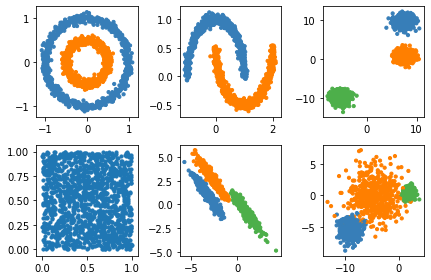

In [5]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(100, 100)) 
fig.subplots_adjust(bottom=0.5)

f,ax=plt.subplots(2,3) # 3x2 의 Figure 와 Axes

#각 subplot 크기를 조정하는 방법
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[1, 1], #height 비율
                       width_ratios=[1,1,1]  #width 비율
                      )

#noisy_circles plot
ax[0] = plt.subplot(gs[0])
ax[0]=plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors1[y1])

# noisy_moons plot
ax[0] = plt.subplot(gs[1])
ax[0] = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors2[y2])

# blobs plot
ax[0] = plt.subplot(gs[2])
ax[0] = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors3[y3])

# no_structure plot
ax[0] = plt.subplot(gs[3])
ax[0] = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=y4)  #no_structure 의 y4는 None이므로 colors 함수에 대입하지 않았다.

# aniso plot
ax[0] = plt.subplot(gs[4])
ax[0] = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors5[y5])

# varied plot
ax[0] = plt.subplot(gs[5])
ax[0] = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors6[y6])

plt.tight_layout()
plt.show()

- 그래프를 보면 윗줄 왼쪽부터 2, 2, 3, ?, 3, 3개의 group이 육안으로 확인 가능하다.

### KMeans Clustering

In [6]:
# KMeans 군집 모델 package import
from sklearn.cluster import KMeans

In [7]:
# 각 모형에서 원래 group 수 대로 clustering prediction 진행
y1_pred=KMeans(n_clusters=2, random_state=0).fit_predict(X1)
y2_pred=KMeans(n_clusters=2, random_state=0).fit_predict(X2)
y3_pred=KMeans(n_clusters=3, random_state=0).fit_predict(X3)
y4_pred=KMeans(n_clusters=5, random_state=0).fit_predict(X4) #group 수 임의로 지정
y5_pred=KMeans(n_clusters=3, random_state=0).fit_predict(X5)
y6_pred=KMeans(n_clusters=3, random_state=0).fit_predict(X6)

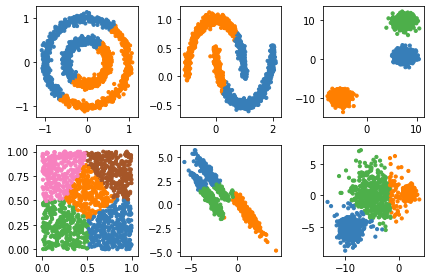

In [8]:
f,ax=plt.subplots(2,3) # 3x2 의 Figure 와 Axes

#각 subplot 크기를 조정하는 방법
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[1, 1], #height 비율
                       width_ratios=[1,1,1]  #width 비율
                      )

#noisy_circles plot
ax[0] = plt.subplot(gs[0])
ax[0]=plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors1[y1_pred])

# noisy_moons plot
ax[0] = plt.subplot(gs[1])
ax[0] = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors2[y2_pred])

# blobs plot
ax[0] = plt.subplot(gs[2])
ax[0] = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors3[y3_pred])

# no_structure plot
ax[0] = plt.subplot(gs[3])
ax[0] = plt.scatter(X4[:, 0], X4[:, 1], s=10, c=colors4[y4_pred])

# aniso plot
ax[0] = plt.subplot(gs[4])
ax[0] = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors5[y5_pred])

# varied plot
ax[0] = plt.subplot(gs[5])
ax[0] = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors6[y6_pred])

plt.tight_layout()
plt.show()

보면 집단이 원으로 뭉쳐있는 3번째(위->아래, 왼쪽->오른쪽 순) 그룹만 잘 분류가 되었고 나머지는 분류가 잘 안됨을 알 수 있다.<br/>
KMeans clustering은 각 그룹이 빽빽히 뭉쳐있는 경우가 아니면 정확도가 낮음을 알 수 있다.<br/>
특히나 뭉쳐진 모양이 아닌 1,2,5번째와 같이 특정 모양을 띨 경우 더더욱이 분류가 안됨을 알 수 있다.

### Agglomerative Clustering

In [9]:
from sklearn.cluster import AgglomerativeClustering
# 각 모형에서 원래 group 수 대로 clustering prediction 진행
y1_pred=AgglomerativeClustering(n_clusters=2).fit_predict(X1)
y2_pred=AgglomerativeClustering(n_clusters=2).fit_predict(X2)
y3_pred=AgglomerativeClustering(n_clusters=3).fit_predict(X3)
y4_pred=AgglomerativeClustering(n_clusters=5).fit_predict(X4) #group 수 임의로 지정
y5_pred=AgglomerativeClustering(n_clusters=3).fit_predict(X5)
y6_pred=AgglomerativeClustering(n_clusters=3).fit_predict(X6)

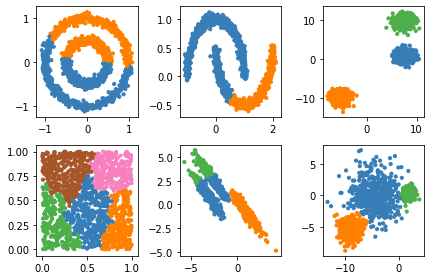

In [10]:
f,ax=plt.subplots(2,3) # 3x2 의 Figure 와 Axes

#각 subplot 크기를 조정하는 방법
gs = gridspec.GridSpec(nrows=2, # row 몇 개 
                       ncols=3, # col 몇 개 
                       height_ratios=[1, 1], #height 비율
                       width_ratios=[1,1,1]  #width 비율
                      )

#noisy_circles plot
ax[0] = plt.subplot(gs[0])
ax[0]=plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors1[y1_pred])

# noisy_moons plot
ax[0] = plt.subplot(gs[1])
ax[0] = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors2[y2_pred])

# blobs plot
ax[0] = plt.subplot(gs[2])
ax[0] = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors3[y3_pred])

# no_structure plot
ax[0] = plt.subplot(gs[3])
ax[0] = plt.scatter(X4[:, 0], X4[:, 1], s=10, c=colors4[y4_pred])

# aniso plot
ax[0] = plt.subplot(gs[4])
ax[0] = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors5[y5_pred])

# varied plot
ax[0] = plt.subplot(gs[5])
ax[0] = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors6[y6_pred])

plt.tight_layout()
plt.show()


Agglomerative Clustering을 진행한 결과 kmeans와는 살짝 다른 결과가 도출되었다.<br/>
6번째 모형을 보면 원래 분류와 거의 동일하게 분류가 됨을 알 수 있었다. <br/>
또한 kmeans clustering은 나눠진 그룹의 크기가 거의 같도록 분류되었다면 agglomerative clustering은 이에 구애받지 않고 group이 나누어짐을 알 수 있었다.(이는 1,2번의 파란색 group의 크기가 더 큼을 통해 추론 가능하다. kmeans는 색깔별 크기가 거의 동일)<br/>


### Different clustering methods
이제 다양한 clustering 방법을 통해 분류를 진행해보겠다.
여기서 쓰일 clustering method는 다음과 같다.
- KMeans, DBSCAN, Agglomerative Clustering, Mean shift, Spectral Clustering, Birch

In [70]:
#필요한 package 집합
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch

#그룹 2개로 분류
def plotall2(dataset):
    X, y = dataset
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    fig, axes = plt.subplots(1, 7, figsize=(20, 3),
                             subplot_kw={'xticks': (), 'yticks': ()})

    # 비교를 위해 무작위로 클러스터 할당을 합니다
    random_state = np.random.RandomState(seed=0)
    random_clusters = random_state.randint(low=0, high=2, size=len(X))

    # 무작위 할당한 클러스터를 그립니다
    axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                    cmap=mglearn.cm3, s=60, edgecolors='black')
    axes[0].set_title("무작위 할당")

    algorithms = [AgglomerativeClustering(n_clusters=2,linkage='ward'), 
                  KMeans(n_clusters=2),
                  DBSCAN(), 
                  MeanShift(), 
                  SpectralClustering(n_clusters=2,affinity="nearest_neighbors"),
                  Birch(n_clusters=2), 
                  AffinityPropagation()]

    for ax, algorithm in zip(axes[1:], algorithms):
        clusters = algorithm.fit_predict(X_scaled)
        # 클러스터 할당과 클러스터 중심을 그립니다
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
                   s=60, edgecolors='black')
        ax.set_title("{}".format(algorithm.__class__.__name__))
        
        
#그룹 3개로 분류        
def plotall3(dataset):
    X, y = dataset
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)

    fig, axes = plt.subplots(1, 7, figsize=(20, 3),
                             subplot_kw={'xticks': (), 'yticks': ()})

    # 비교를 위해 무작위로 클러스터 할당을 합니다
    random_state = np.random.RandomState(seed=0)
    random_clusters = random_state.randint(low=0, high=2, size=len(X))

    # 무작위 할당한 클러스터를 그립니다
    axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                    cmap=mglearn.cm3, s=60, edgecolors='black')
    axes[0].set_title("무작위 할당")

    algorithms = [AgglomerativeClustering(n_clusters=3,linkage='ward'), 
                  KMeans(n_clusters=3),
                  DBSCAN(), 
                  MeanShift(), 
                  SpectralClustering(n_clusters=3,affinity="nearest_neighbors"),
                  Birch(n_clusters=3), 
                  AffinityPropagation()]

    for ax, algorithm in zip(axes[1:], algorithms):
        clusters = algorithm.fit_predict(X_scaled)
        # 클러스터 할당과 클러스터 중심을 그립니다
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
                   s=60, edgecolors='black')
        ax.set_title("{}".format(algorithm.__class__.__name__))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


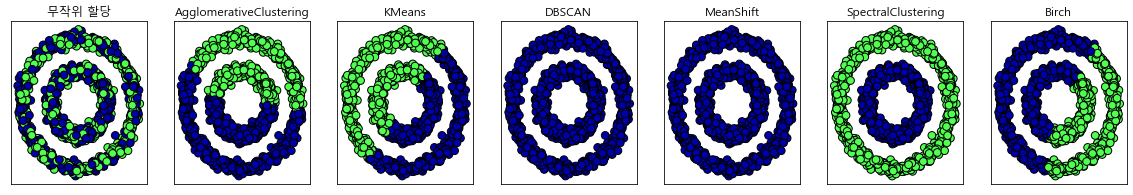

In [71]:
plotall2(datasets[0])

noisy circles는 spectral clustering이 잘 되는 듯 보인다.<br/>
DBSCAN과 meanshift method도 다른 것과는 달리 원형 모향을 잘 살려 clustering한 것을 알 수 있는데 안쪽과 바깥쪽을 구분 못하고 하나로 인식한 것이 아쉬운 점이다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


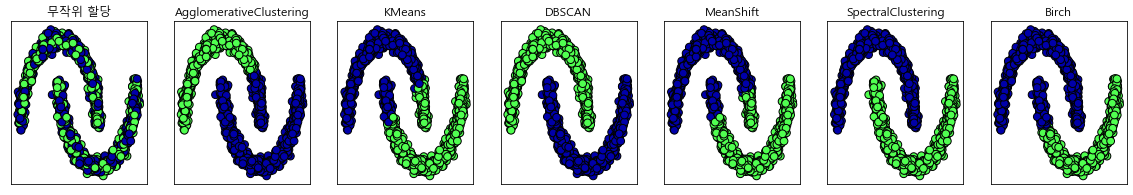

In [72]:
plotall2(datasets[1])

noisy moons는 DBSCAN과 Spectral Clustering이 뛰어난 성능을 보인다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


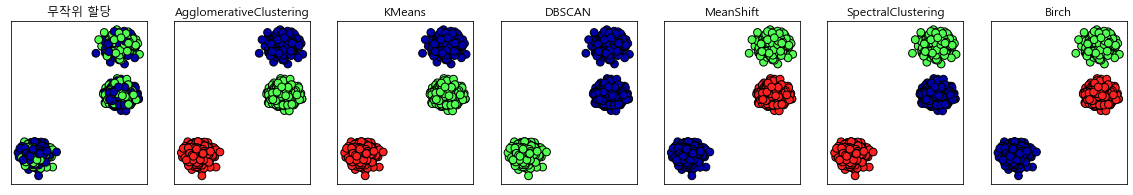

In [73]:
plotall3(datasets[2])

blobs는 agglomerative clustering, kmeans, MeanShift, spectral clustering, birch가 정확하게 분류하였다.<br/>
제일 분류하기 쉬운 모형이긴 한 것 같다.

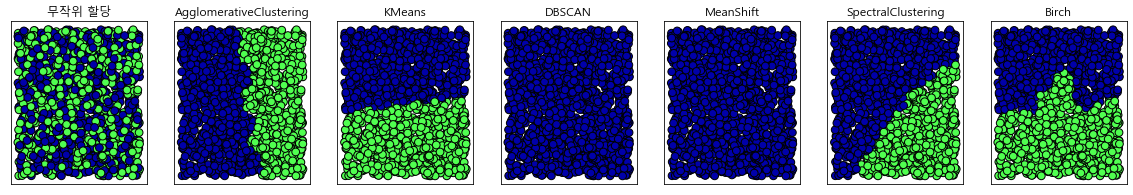

In [74]:
plotall2(datasets[3])

no_structure은 DBSCAN과 MeanShift가 제대로 clustering하였다.<br/>
하지만 agglomerative clustering과 kmeans, spectral clustering, birch는 number of clusters를 지정해 주었기 때문에 위와 같은 결과를 냈음으로 판단된다.

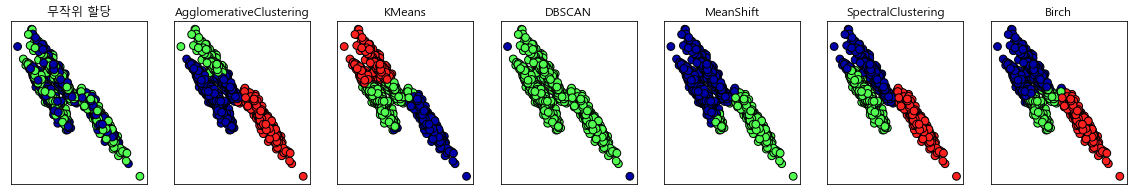

In [75]:
plotall3(datasets[4])

aniso는 spectral clustering이 제일 비슷하게 clustering을 진행한 것으로 보인다.<br/>
agglomerative clustering은 조금 아쉬운 결과를 내었는데 그래도 이와 같은 모형에서는 나름 성능이 좋아 보인다.

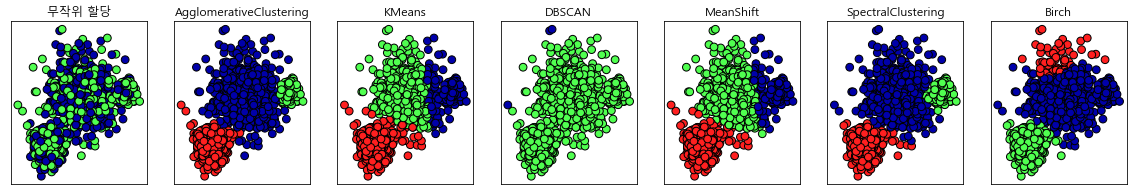

In [76]:
plotall3(datasets[5])

varid는 Agglomerative clustering과 spectral clustring이 제일 좋은 성능을 내었고, kmeans가 조금 아쉬운 결과를 내었다. 

함수 인자 설정 참조)
http://scikit-learn.sourceforge.net/dev/auto_examples/cluster/plot_cluster_comparison.html

# 2) Hierarchical Clustering
### 클러스터간의 거리 측정 방식에 따른 분석
 - Min(Single Link) , Max(Complete Link), Group Average, Centroid, Ward

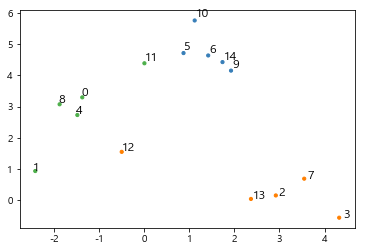

In [97]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage
X, y = datasets.make_blobs(random_state=0, n_samples=15)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])

#각 점이 몇번째 점인지 출력
for i in range(len(X)):
    x = X[i,0]
    y = X[i,1]
    #plt.plot(x, y)
    plt.text(x * (1 + 0.02), y * (1 + 0.02) , i, fontsize=12)

plt.show()

- Min(Single Link) Method

Text(0, 0.5, '클러스터 거리')

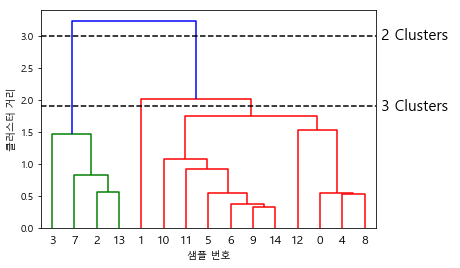

In [80]:
#method=’single’는 Nearest Point Algorithm을 나타내는 것으로
#min(single link) proximity를 나타내는 것이다.
linkage_array = linkage(X, method='single', metric='euclidean')
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)


# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [3, 3], '--', c='k')
ax.plot(bounds, [1.9, 1.9], '--', c='k')


ax.text(bounds[1], 3, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 1.9, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

- Max(Complete Link) Method

Text(0, 0.5, '클러스터 거리')

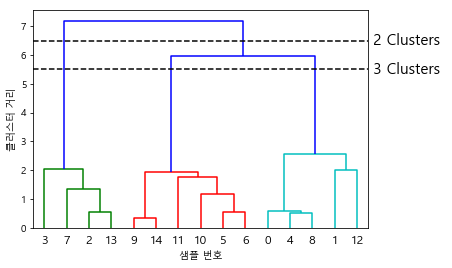

In [83]:
#method=’complete’는 Farthest Point Algorithm(Voor Hees Algorithm)을 나타내는 것으로
#Max(complete link) Proximity를 나타내는 것이다.
linkage_array = linkage(X, method='complete', metric='euclidean')

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)


# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [6.5, 6.5], '--', c='k')
ax.plot(bounds, [5.5, 5.5], '--', c='k')


ax.text(bounds[1], 6.5, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 5.5, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- Group Average Method

Text(0, 0.5, '클러스터 거리')

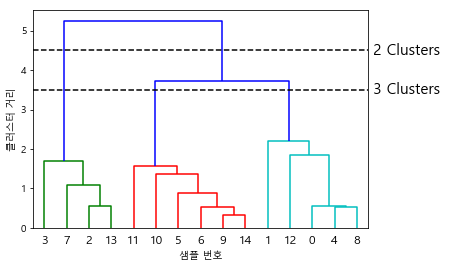

In [85]:
#method=’average’는 group aberage Proximity를 나타내는 것이다.
linkage_array = linkage(X, method='average', metric='euclidean')

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)


# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4.5, 4.5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')


ax.text(bounds[1], 4.5, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- Centroid Method

Text(0, 0.5, '클러스터 거리')

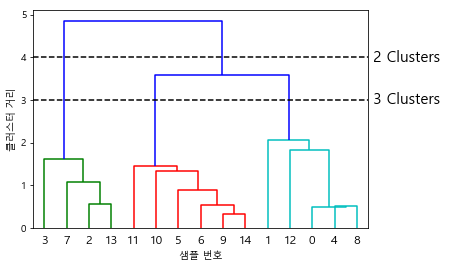

In [87]:
#method=’centriod’는 centriod Proximity를 나타내는 것이다.
linkage_array = linkage(X, method='centroid', metric='euclidean')

# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)


# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4,4], '--', c='k')
ax.plot(bounds, [3, 3], '--', c='k')


ax.text(bounds[1], 4, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 3, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- Ward Method

Text(0, 0.5, '클러스터 거리')

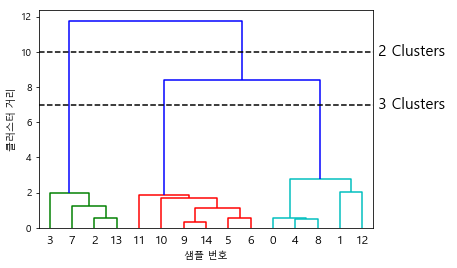

In [89]:
# 데이터 배열 X 에 ward 함수를 적용합니다
# 이는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 리턴합니다
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [10, 10], '--', c='k')
ax.plot(bounds, [7, 7], '--', c='k')

ax.text(bounds[1], 10, ' 2 Clusters ', va='center', fontdict={'size': 15})
ax.text(bounds[1], 7, ' 3 Clusters ', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

5가지 method의 2,3 clusters로 구분되는 대략적인 거리를 정리해보면 다음과 같다.<br/>
- Min(single link)method : 3, 1.9 <br/>
- Max(complete link)method: 6.5, 5.5 <br/>
- Group average method: 4.5, 3.5 <br/>
* Centroid method: 4, 3<br/>
- Ward method: 10, 7
<br/><br/>
구분 거리는 min < centriod < group average < max < ward 순으로 나타낼 수 있다.<br/>
Single linkage는 두 그룹이 묶일 때 한 쌍의 point들만 가까우면 되므로 만들어진 cluster가 너무 분산되어 있을 가능성이 있다. <br/>
위 결과에서 보면 1이 (0,4,8)이 아닌 (5,6,10,11,..)에 묶여 있는 것으로 이를 확인할 수 있다.<br/>
반대로 complete linkage는 만들어지는 cluster가 너무 밀집되어 있을 가능성이 크다.<br/>
이 둘을 완화하는 방법이 group average method와 centroid method라 볼 수 있을 것 같다. <br/>

# 3) K-Means Clustering
### 초기값/update Centroid

kmeans clustering은 centriod 위치를 정하고, 그 위치에서 데이터까지의 distance 연산을 통해 clustering하는 알고리즘이다. <br/>
그러하여 Centriod 위치 지정이 중요한데 이를 지정하는 방법은 다음과 같다.
- Random Partition
       임의로 cluster number를 부여하여 clustering 진행.
- Forgy/Lloyd
       데이터 중 K개의 데이터를 뽑아(중복X) Centroid로 설정, clustering 진행 완료 후 centroid 재설정. 이를 반복
- MacQueen
       데이터 중 K개의 데이터를 뽑아(중복X) Centroid로 설정, clustering 진행 [여기까지는 forgy와 같음], 만약 한 데이터가 현재 속해 있는 cluster(A)의 centroid보다 다른 cluster(B)의 centroid가 더 가깝다고 판단되는 경우 데이터는 B cluster에 할당되고 cluster의 centroid가 현재 cluster에 속한 데이터의 평균으로 다시 계산된다.
- Hartigan & Wong
       within-cluster sum of squares of errors를 최소화하는 알고리즘.
       centroid초기 설정은 forgy와 같으며 가까운 centroid에 데이터가 속한 것도 같으나 만약 cluster 변경이 생긴 경우 SSE를 계산하여 cluster 변경 후의 SSE가 더 작은 경우에만 변경 유지.


참조: 
https://loveayase.tumblr.com/post/136865706969/java-k-means-algorithm
http://www.tqmp.org/RegularArticles/vol09-1/p015/p015.pdf